In [18]:
import torch
import matplotlib.pyplot as plt
from monai.transforms import (
    Rand3DElastic,
    RandRotate,
    RandAffine,
    RandAdjustContrast,
    Compose
)

In [14]:
tensor = torch.load("../data/processed/tensors/00001.pt", weights_only=False)  # shape: (1, Z, Y, X) lub (Z, Y, X)
if tensor.ndim == 5:
    tensor = tensor.squeeze()
if tensor.ndim <= 3:
    tensor = tensor.unsqueeze(0)  # -> (1, Z, Y, X)

In [15]:
tensor.shape

torch.Size([1, 64, 64, 64])

In [16]:
z_idx = tensor.shape[1] // 2
original_slice = tensor[0, z_idx].numpy()

In [22]:
elastic = Rand3DElastic(
    sigma_range=(5, 8), magnitude_range=(100, 200),
    prob=1.0, spatial_size=tuple(tensor.shape[1:])
)

rotate = RandRotate(
    range_x=0.3, range_y=0.3, range_z=0.3,
    prob=1.0, keep_size=True
)

scale = RandAffine(
    scale_range=(0.2, 0.2, 0.2),
    rotate_range=None,
    translate_range=None,
    shear_range=None,
    prob=1.0,
    spatial_size=tuple(tensor.shape[1:])
)

gamma = RandAdjustContrast(
    gamma=(0.7, 1.5), prob=1.0
)

all_transforms = Compose([
    elastic,
    rotate,
    scale,
    gamma
])

elastic_tensor = elastic(tensor.clone())
rotate_tensor = rotate(tensor.clone())
scale_tensor = scale(tensor.clone())
gamma_tensor = gamma(tensor.clone())
all_tensor = all_transforms(tensor.clone())

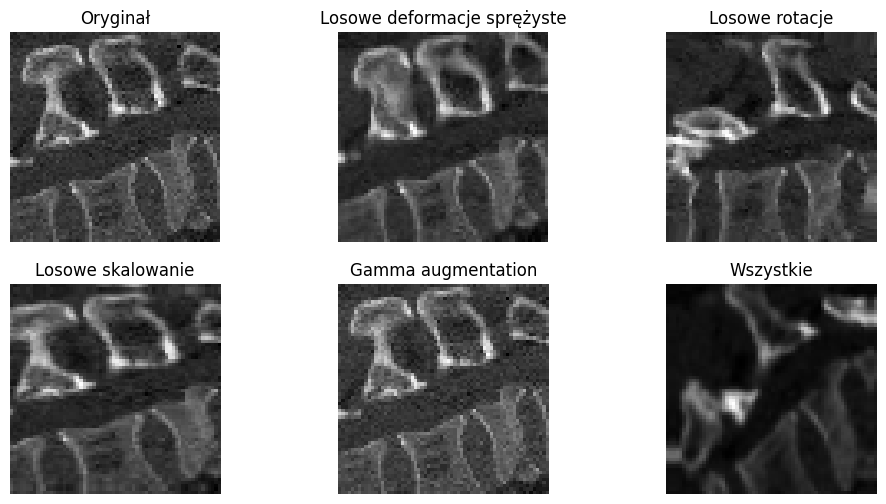

In [28]:
slices = [
    ("Oryginał", original_slice),
    ("Losowe deformacje sprężyste", elastic_tensor[0, z_idx].numpy()),
    ("Losowe rotacje", rotate_tensor[0, z_idx].numpy()),
    ("Losowe skalowanie", scale_tensor[0, z_idx].numpy()),
    ("Gamma augmentation", gamma_tensor[0, z_idx].numpy()),
    ("Wszystkie", all_tensor[0, z_idx].numpy())
]

plt.figure(figsize=(12, 6))
for i, (title, img) in enumerate(slices):
    plt.subplot(2, 3, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")

# plt.tight_layout()
plt.show()